In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
%matplotlib inline 

In [2]:
train_raw = pd.read_csv("train.csv", index_col='Id')

In [3]:
train_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 4.54282543,  4.67633758,  4.80984973,  4.94336188,  5.07687404,
         5.21038619,  5.34389834,  5.47741049,  5.61092265,  5.7444348 ,
         5.87794695]),
 <a list of 10 Patch objects>)

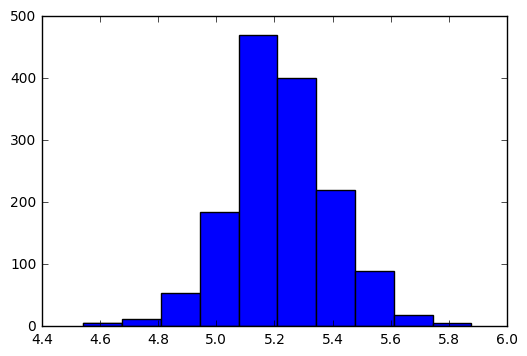

In [4]:
y = np.log10(train_raw['SalePrice'])
matplot.hist(y)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [6]:
X = train_raw['LotArea']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
reg = linear_model.Lasso
# tuned_parameters = [{'alpha': [0.1, 0.4, 0.8]}]
# clf = GridSearchCV(reg(alpha = 0.1), tuned_parameters, cv=5,scoring='precision')
clf = reg(0.1)

In [9]:
X_train = X_train.reshape(len(X_train),1)
y_train = y_train.reshape(len(y_train),1)

/Users/AP_Yan/anaconda/envs/demo_py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/AP_Yan/anaconda/envs/demo_py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [10]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)